In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 6
fig_height = 4
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2023/Particles':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2023/Particles')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.

/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_7805/3282755147.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
import numpy as np
from numba import jit

@jit(nopython=True)
def inverse_cdf(su, W):
    """Inverse CDF algorithm for a finite distribution.
    su: (M,) ndarray of sorted uniform variables
    W: (N,) ndarray of normalized weights"""
    j = 0
    s = W[0]
    M = su.shape[0]
    A = np.empty(M, dtype=np.int64)
    for n in range(M):
        while su[n] > s:
            j += 1
            s += W[j]
        A[n] = j
    return A

def systematic(W, M):
    """Systematic resampling
    W: (N,) ndarray of normalized weights
    M : number of resampled points"""
    su = (random.rand(1) + np.arange(M)) / M
    return inverse_cdf(su, W)

In [3]:
class Weights:
    """A class to hold the N weights of the particles"""
    def __init__(self, lw=None):
        self.lw = lw  # t=0で呼ばれた際はNoneである
        if lw is not None:
            self.lw[np.isnan(self.lw)] = -np.inf  # 欠損値処理
            m = self.lw.max()
            w = np.exp(self.lw - m)  # 大きすぎる値にならないように
            s = w.sum()
            self.W = w / s  # 正規化荷重
            self.ESS = 1.0 / np.sum(self.W ** 2)
            self.log_mean = m + np.log(s / self.N)
    
    @property
    def N(self):
        """Number of particles"""
        return 0 if self.lw is None else self.lw.shape[0]

    def add(self, delta):
        """Add increment weights delta to the log weights"""
        if self.lw is None:
            return self.__class__(lw=delta)
        else:
            return self.__class__(lw=self.lw + delta)

In [4]:
class Collector:
    """Base class for collectors"""
    def __init__(self, **kwargs):
        self.summary = []

    def collect(self, smc):
        self.summary.append(self.fetch(smc))

class ESSs(Collector):
    summary_name = "ESSs"
    def fetch(self, smc):
        return smc.wgts.ESS

class LogLts(Collector):
    summary_name = "LogLts"
    def fetch(self, smc):
        return smc.logLt

class Rs_flags(Collector):
    summary_name = "Rs_flags"
    def fetch(self, smc):
        return smc.rs_flag

class Moments(Collector):
    """Collects empirical moments of the particles"""
    summary_name = "Moments"
    def fetch(self, smc):
        m = np.average(smc.X, weights=smc.wgts.W, axis=0)
        m2 = np.average(smc.X ** 2, weights=smc.wgts.W, axis=0)
        v = m2 - m ** 2
        return {"mean": m, "var": v}

default_collector_cls = [ESSs, LogLts, Rs_flags]

In [5]:
class Summaries:
    """A class to hold the summaries of the SMC algorithm"""
    def __init__(self, cols):
        self._collectors = [cls() for cls in default_collector_cls]
        if cols is not None:
            self._collectors.extend(col() for col in cols)
        for col in self._collectors:
            setattr(self, col.summary_name, col.summary)

    def collect(self, smc):
        for col in self._collectors:
            col.collect(smc)

In [6]:
class ParticleHistory:
    """History of the particles
    Full history that keeps all the particle systems based on lists.
    """
    def __init__(self, fk):
        self.X, self.A, self.wgts = [], [], []
        self.fk = fk

    def save(self, smc):
        self.X.append(smc.X)
        self.A.append(smc.A)
        self.wgts.append(smc.wgts)

In [7]:
def generate_hist_obj(option, smc):
    if option is True:
        return ParticleHistory(smc.fk)
    else:
        return None

In [8]:
class SMC:
    """Metaclass for SMC algorithms"""

    def __init__(
        self,
        fk=None,
        N=100,
        resampling="systematic",
        ESSrmin=0.5,
        store_history=False,
        collect=None,
    ):

        self.fk = fk
        self.N = N
        self.resampling = resampling
        self.ESSrmin = ESSrmin

        # initialisation
        self.t = 0
        self.rs_flag = False  # no resampling at time 0, by construction
        self.logLt = 0.0
        self.wgts = Weights()
        self.X, self.Xp, self.A = None, None, None

        self.summaries = Summaries(collect)
        self.hist = generate_hist_obj(store_history, self)

    def generate_particles(self):
        """Generate particles at time t=0"""
        self.X = self.fk.M0(self.N)
    
    def reset_weights(self):
        """Reset weights to uniform after a resamping step"""
        self.wgts = Weights()
    
    def resample_move(self):
        """Adaptively resample and move particles at time t"""
        self.rs_flag = self.fk.time_to_resample(self)
        if self.rs_flag:
            self.A  = systematic(self.wgts.W, M=self.N)
            self.Xp = self.X[self.A]
            self.reset_weights()
        else:
            self.A = np.arange(self.N)
            self.Xp = self.X
        self.X = self.fk.M(self.t, self.Xp)

    def reweight_particles(self):
        """Reweight particles at time t"""
        self.wgts = self.wgts.add(self.fk.logG(self.t, self.Xp, self.X))

    def compute_summaries(self):
        """Compute summaries at time t"""
        if self.t > 0:  # なぜかこれを前におかないとUnboundLocalErrorが出る
            prec_log_mean_w = self.log_mean_w
        self.log_mean_w = self.wgts.log_mean
        if self.t == 0 or self.rs_flag:
            self.loglt = self.log_mean_w
        else:
            self.loglt = self.log_mean_w - prec_log_mean_w
        self.logLt += self.loglt

        self.hist.save(self)
        self.summaries.collect(self)

    def __next__(self):
        """One step of the SMC algorithm"""
        if self.fk.done(self):
            raise StopIteration
        if self.t == 0:
            self.generate_particles()
        else:
            self.resample_move()
        self.reweight_particles()
        self.compute_summaries()
        self.t += 1

    def __iter__(self):
        return self

    def run(self):
        """Run the SMC algorithm until completion"""
        for _ in self:
            pass

In [9]:
import pandas as pd

data = pd.read_csv("TemperatureDataAtTokyo.csv")
print(data.describe())

                年度         日平均         日最高        日最低          最高          最低
count   147.000000  147.000000  147.000000  147.00000  147.000000  147.000000
mean   1949.000000   14.963946   19.337415   11.12517   35.098639   -4.317687
std      42.579338    1.132396    0.875794    1.46614    1.674956    2.439366
min    1876.000000   12.900000   17.500000    8.30000   31.600000   -9.200000
25%    1912.500000   14.000000   18.700000    9.90000   34.000000   -6.150000
50%    1949.000000   14.800000   19.300000   10.80000   34.900000   -4.700000
75%    1985.500000   15.800000   19.900000   12.30000   36.200000   -2.250000
max    2022.000000   17.300000   21.300000   13.90000   39.500000    0.900000


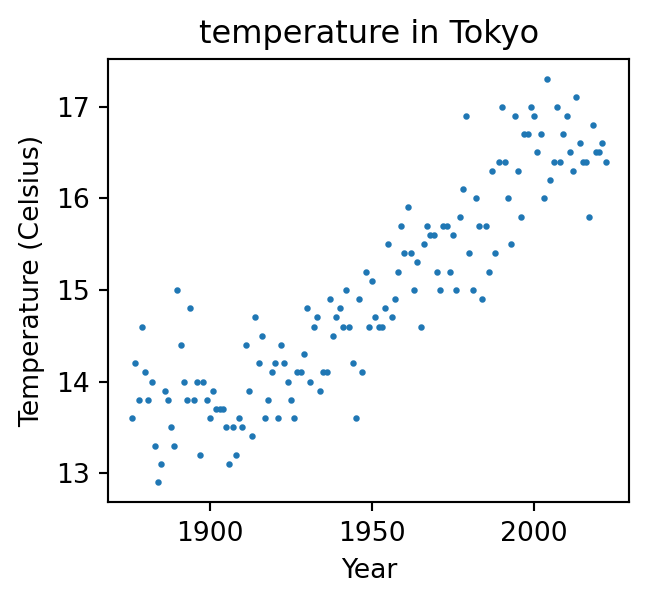

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3.5, 3))

plt.title("temperature in Tokyo")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")

plt.scatter(data['年度'], data['日平均'], s=2)
plt.show()

In [11]:
from numpy import random
from scipy import stats

class Bootstrap:
    """Abstract base class for Feynman-Kac models derived from State Space Model (1).
    """

    def __init__(self, data, T, R, Q):
        self.data = data
        self.T = T
        self.R = R
        self.Q = Q
    
    def M0(self, N):
        """Sample N times from initial distribution M0 of the FK model"""
        return random.normal(loc=13.6, scale=self.Q, size=N)
    
    def M(self, t, xp):  # xp: resampled previous state
        """Sample Xt from kernel Mt conditioned on Xt-1=xp"""
        return random.normal(loc=xp, scale=self.Q, size=xp.shape[0])
    
    def logG(self, t, xp, x):  # x: current state
        """Evaluate the log potential Gt(xt-1,xt)"""
        return stats.norm.logpdf(self.data[t], loc=x, scale=self.R)
    
    def time_to_resample(self, smc):
        """Return True if resampling is needed"""
        return smc.wgts.ESS < smc.N * smc.ESSrmin
    
    def done(self, smc):
        """Return True if the algorithm is done"""
        return smc.t >= self.T

In [12]:
model1 = Bootstrap(data=data['日平均'], T=data.shape[0], R=0.2, Q=0.1)
PF1 = SMC(fk=model1, N=1000, resampling="systematic", ESSrmin=0.5, collect=[Moments], store_history=True)
PF1.run()

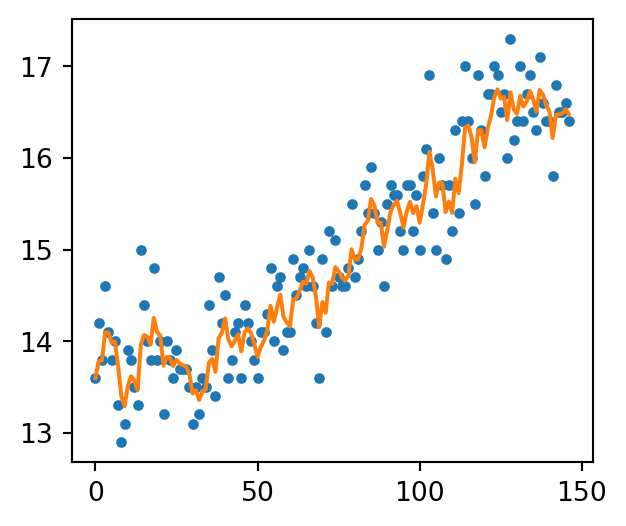

In [13]:
#| label: fig-2-1
#| fig-cap: '(R,Q)=(0.2,0.1) の場合の粒子フィルターの実行結果'
plt.figure(figsize=(3.5, 3))
plt.plot(data['日平均'], label='data', linestyle='', marker='.')
plt.plot([m['mean'] for m in PF1.summaries.Moments], label='filtered temperature trend')
plt.show()

In [14]:
model4 = Bootstrap(data=data['日平均'], T=data.shape[0], R=0.7, Q=0.1)
PF4 = SMC(fk=model4, N=1000, resampling="systematic", ESSrmin=0.5, collect=[Moments], store_history=True)
PF4.run()

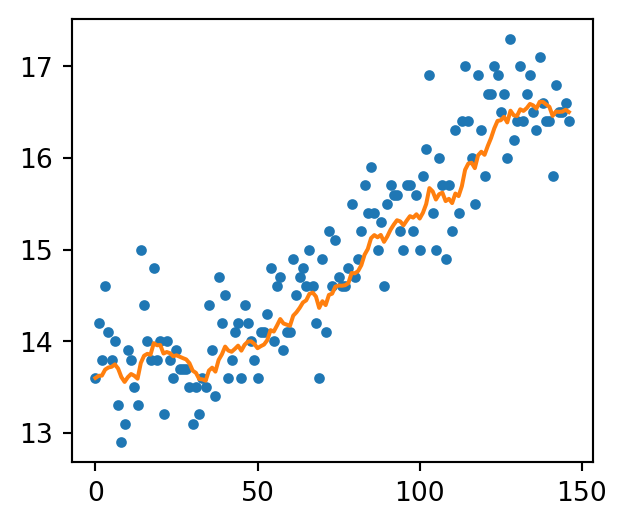

In [15]:
#| fig-cap: "(R,Q)=(0.7,0.1) の場合の粒子フィルターの実行結果"
plt.figure(figsize=(3.5, 3))
plt.plot(data['日平均'], label='data', linestyle='', marker='.')
plt.plot([m['mean'] for m in PF4.summaries.Moments], label='filtered temperature trend')
plt.show()

In [16]:
model2 = Bootstrap(data=data['日平均'], T=data.shape[0], R=0.2, Q=0.01)
PF2 = SMC(fk=model2, N=1000, resampling="systematic", ESSrmin=0.5, collect=[Moments], store_history=True)
PF2.run()

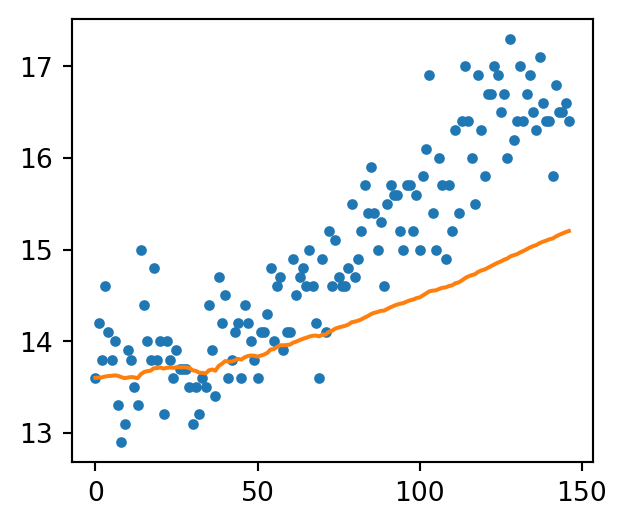

In [17]:
#| fig-cap: "(R,Q)=(0.2,0.01) の場合の粒子フィルターの実行結果"
plt.figure(figsize=(3.5, 3))
plt.plot(data['日平均'], label='data', linestyle='', marker='.')
plt.plot([m['mean'] for m in PF2.summaries.Moments], label='filtered temperature trend')
plt.show()

In [18]:
model3 = Bootstrap(data=data['日平均'], T=data.shape[0], R=0.2, Q=1.0)
PF3 = SMC(fk=model3, N=1000, resampling="systematic", ESSrmin=0.5, collect=[Moments], store_history=True)
PF3.run()

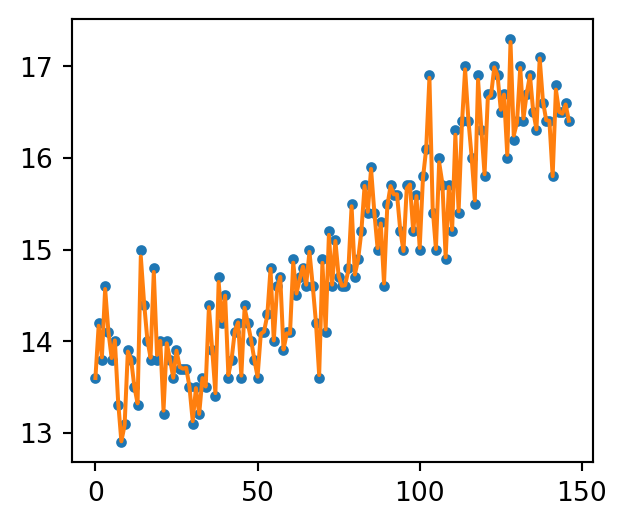

In [19]:
#| fig-cap: "(R,Q)=(0.2,1) の場合の粒子フィルターの実行結果"
plt.figure(figsize=(3.5, 3))
plt.plot(data['日平均'], label='data', linestyle='', marker='.')
plt.plot([m['mean'] for m in PF3.summaries.Moments], label='filtered temperature trend')
plt.show()

In [20]:
from pykalman import KalmanFilter
KF1 = KalmanFilter(initial_state_mean=13.6, initial_state_covariance=0.1,
                   transition_matrices=1, observation_matrices=1,
                   transition_covariance=0.1, observation_covariance=0.2, n_dim_state=1, n_dim_obs=1)
KF1 = KF1.em(data['日平均'], n_iter=5)  # EMアルゴリズムの過適応回避のため
(filtered_state_means, filtered_state_covariances) = KF1.filter(data['日平均'])

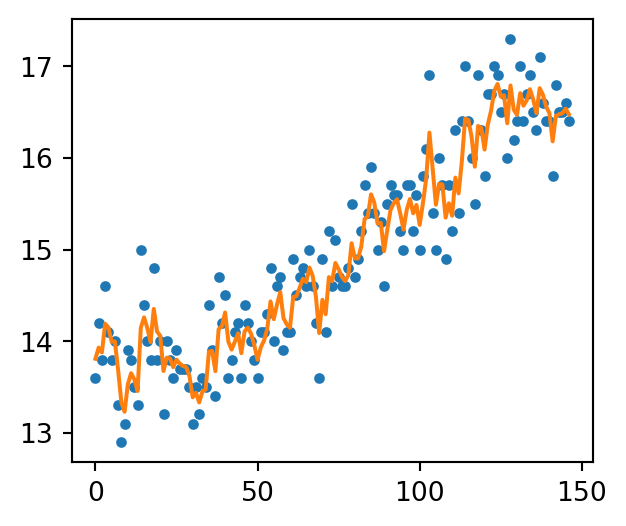

In [21]:
#| fig-cap: "(R,Q)=(0.2,0.1) の場合のKalmanフィルターの実行結果"
plt.figure(figsize=(3.5, 3))
plt.plot(data['日平均'], label='data', linestyle='', marker='.')
plt.plot(filtered_state_means, label='filtered temperature trend')
plt.show()

In [22]:
(smoothed_state_means, smoothed_state_covariances) = KF1.smooth(data['日平均'])

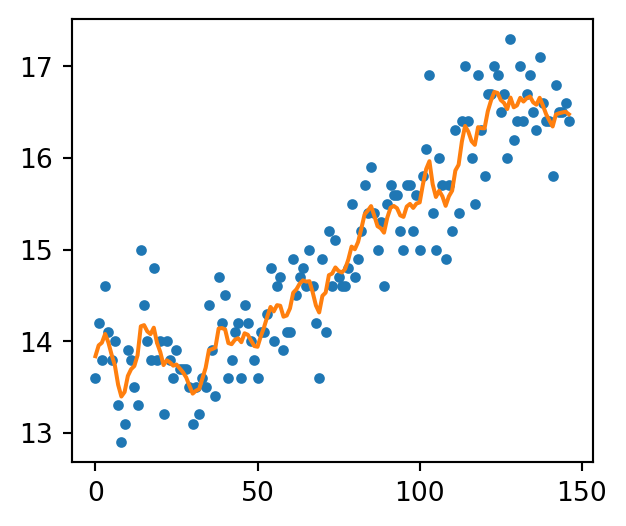

In [23]:
#| fig-cap: "(R,Q)=(0.2,0.1) の場合のKalman平滑化の実行結果"
plt.figure(figsize=(3.5, 3))
plt.plot(data['日平均'], label='data', linestyle='', marker='.')
plt.plot(smoothed_state_means, label='smoothed temperature trend')
plt.show()